In [1]:
import pandas as pd
import sqlite3

In [2]:
conn = sqlite3.connect('../data/checking-logs.sqlite')

# Exercise 02 : Bar

In [3]:
query = """
SELECT 
    DATE(timestamp) as date,
    CASE 
        WHEN CAST(strftime('%H', timestamp) AS INTEGER) < 4 THEN 'night'
        WHEN CAST(strftime('%H', timestamp) AS INTEGER) < 10 THEN 'morning'
        WHEN CAST(strftime('%H', timestamp) AS INTEGER) < 17 THEN 'afternoon'
        ELSE 'evening'
    END as daytime,
    COUNT(*) as commits
FROM checker
WHERE uid LIKE 'user_%'
GROUP BY date, daytime
"""

df = pd.read_sql(query, conn)

conn.close()
pivot_df = df.pivot(index='date', columns='daytime', values='commits').fillna(0)
pivot_df = pivot_df[['night', 'morning', 'afternoon', 'evening']]
pivot_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, 2020-04-17 to 2020-05-21
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   night      35 non-null     float64
 1   morning    35 non-null     float64
 2   afternoon  35 non-null     float64
 3   evening    35 non-null     float64
dtypes: float64(4)
memory usage: 1.4+ KB


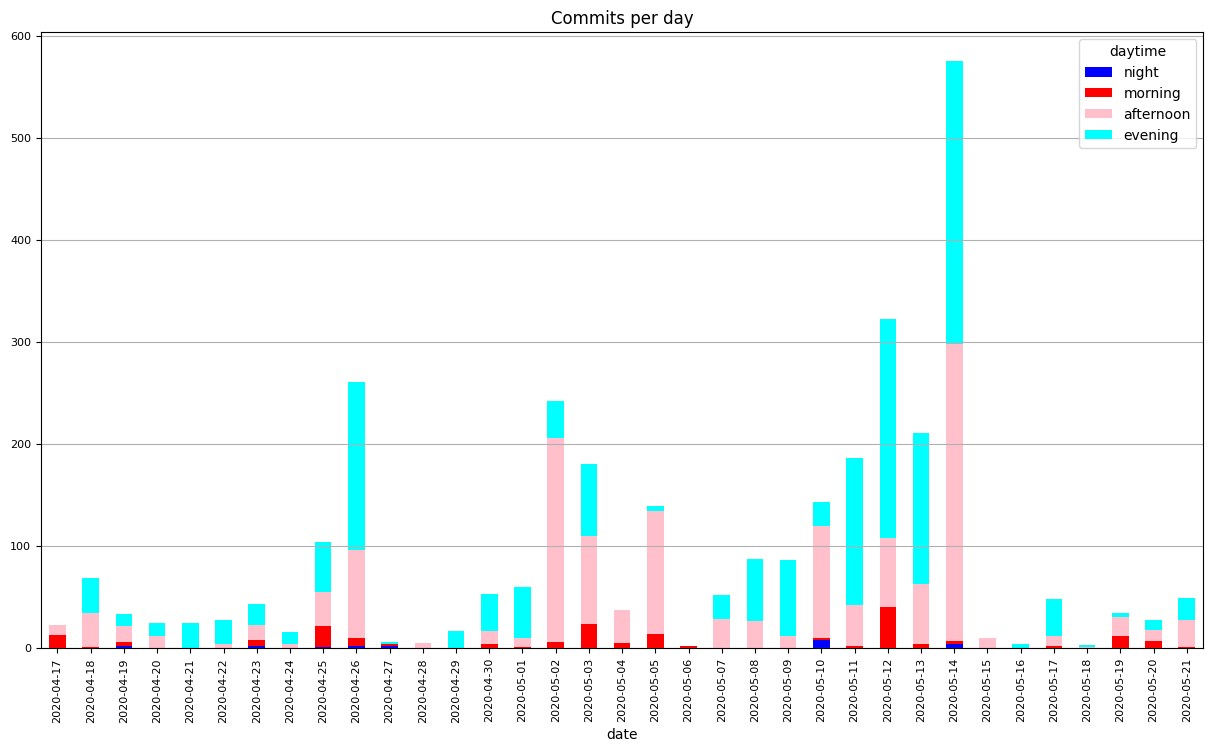

In [4]:
ax = pivot_df.plot.bar(stacked=True, fontsize=8, figsize=(15, 8), title='Commits per day', color={"night": "blue", "morning": "red", 'afternoon': 'pink', 'evening': 'cyan'})
ax.grid(True, axis='y')

When do our users usually commit the labs: in the night, morning, afternoon, or evening?

In [5]:
sorted(pivot_df.sum().nlargest(2).index.tolist())

['afternoon', 'evening']

Which day has the most number of commits and at the same time, the number of commits in the evening is higher than in the afternoon?

In [6]:
total_commits = pivot_df.sum(axis=1)
sorted_days = total_commits.sort_values(ascending=False)
for day in sorted_days.index:
    if pivot_df.loc[day, 'evening'] > pivot_df.loc[day, 'afternoon']:
        result_date = day
        break
result_date

'2020-05-12'